In [1]:
# changing core directory
import os
import sys

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if dir1 not in sys.path:
    sys.path.append(dir1)
os.chdir('..')

In [2]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

# from src.attacks import fgsm_attack, only_disc_attack
# from src.attacks.utils import calculate_metrics_class_and_hiddens, req_grad
from src.config import get_disc_list
from src.data import MyDataset, load_data, transform_data
from src.models.LSTM import LSTM
# from src.utils import load_disc_model

/home/adversarial_attacks/miniconda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
CUDA extension for structured kernels (Cauchy and Vandermonde multiplication) not found. Install by going to extensions/kernels/ and running `python setup.py install`, for improved speed and memory efficiency. Note that the kernel changed for state-spaces 4.0 and must be recompiled.
Falling back on slow Cauchy and Vandermonde kernel. Install at least one of pykeops or the CUDA extension for better speed and memory efficiency.


In [4]:
X_train, y_train, X_test, y_test = load_data('FordA')
X_train, X_test, y_train, y_test = transform_data(X_train, X_test, y_train, y_test, slice_data=False)


In [5]:
y_train

tensor([[0],
        [1],
        [0],
        ...,
        [0],
        [1],
        [0]], dtype=torch.int32)

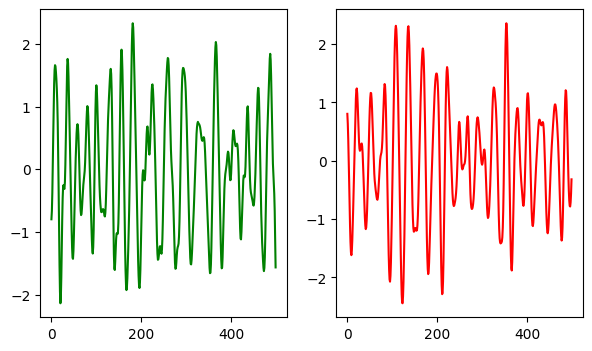

In [14]:
ind_worked = 0
ind_broken = 1
data_worked = X_train[ind_worked].numpy()
data_broken = X_train[ind_broken].numpy()

fig, ax = plt.subplots(1, 2, figsize=(7, 4))
ax[0].plot(data_worked, c='green')
ax[1].plot(data_broken, c='red')
plt.show()

In [15]:
X_train, y_train, X_test, y_test = load_data('Strawberry')
X_train, X_test, y_train, y_test = transform_data(X_train, X_test, y_train, y_test, slice_data=False)


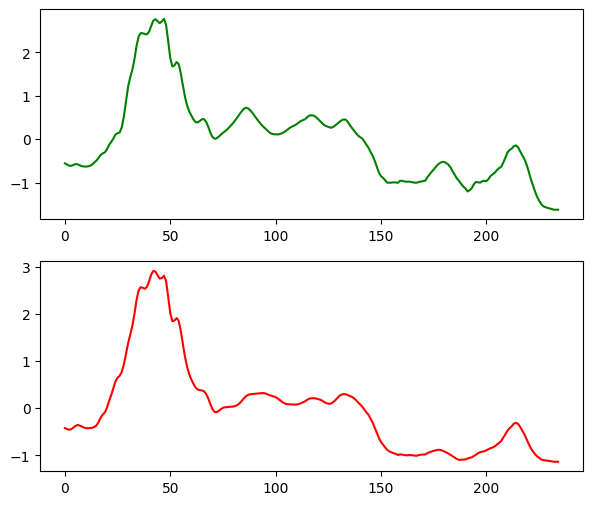

In [21]:
ind_worked = 0
ind_broken = -1
data_worked = X_train[ind_worked].numpy()
data_broken = X_train[ind_broken].numpy()

fig, ax = plt.subplots(2, 1, figsize=(7, 6))
ax[0].plot(data_worked, c='green')
ax[1].plot(data_broken, c='red')
plt.show()